<a href="https://colab.research.google.com/github/argonne-lcf/ai-science-training-series/blob/main/04_intro_to_llms/IntroLLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model Hub
The Model Hub is where the members of the Hugging Face community can host all of their model checkpoints for simple storage, discovery, and sharing.

* Download pre-trained models with the huggingface_hub client library, with Transformers for fine-tuning.
* Make use of Inference API to use models in production settings.
* You can filter for different models for different tasks, frameworks used, datasets used, and many more.
* You can select any model, that will show the model card.
* Model card contains information of the model, including the description, usage, limitations etc. Some models also have inference API's that can be used directly.

Model Hub Link : https://huggingface.co/docs/hub/en/models-the-hub

Example of a model card : https://huggingface.co/bert-base-uncased/tree/main

## Recommended reading

* ["The Illustrated Transformer" by Jay Alammar](https://jalammar.github.io/illustrated-transformer/)
* ["Visualizing A Neural Machine Translation Model (Mechanics of Seq2seq Models With Attention)" by Jay Alammar](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/)
* ["The Illustrated GPT-2 (Visualizing Transformer Language Models)"](https://jalammar.github.io/illustrated-gpt2/)
* ["A gentle introduction to positional encoding"](https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/)
* ["LLM Tutorial Workshop (Argonne National Laboratory)"](https://github.com/brettin/llm_tutorial)
* ["LLM Tutorial Workshop Part 2 (Argonne National Laboratory)"](https://github.com/argonne-lcf/llm-workshop)

## Homework

1. Load in a generative model using the HuggingFace pipeline and generate text using a batch of prompts.
  * Play with generative parameters such as temperature, max_new_tokens, and the model itself and explain the effect on the legibility of the model response. Try at least 4 different parameter/model combinations.
  * Models that can be used include:
    * `google/gemma-2-2b-it`
    * `microsoft/Phi-3-mini-4k-instruct`
    * `meta-llama/Llama-3.2-1B`
    * Any model from this list: [Text-generation models](https://huggingface.co/models?pipeline_tag=text-generation)
    * `gpt2` if having trouble loading these models in
  * This guide should help! [Text-generation strategies](https://huggingface.co/docs/transformers/en/generation_strategies)
2. Load in 2 models of different parameter size (e.g. GPT2, meta-llama/Llama-2-7b-chat-hf, or distilbert/distilgpt2) and analyze the BertViz for each. How does the attention mechanisms change depending on model size?

1. Generative Text Models with HuggingFace
Setup:

Task Steps

* Load the Models: Use pipeline from HuggingFace to load text-generation models, such as google/gemma-2-2b-it, microsoft/Phi-3-mini-4k-instruct, etc.

* Generate Text: Use a batch of prompts (e.g., 3-5 prompts) to evaluate how the model performs. Example prompts:

* Experiment with Parameters: Adjust the following:

 * temperature: Controls randomness in generation (low = deterministic, high = more random).

* * max_new_tokens: Limits the length of the response.

* * top_p or top_k: Filters vocabulary for sampling.

* Document Observations: Compare responses across:

* * Models (e.g., Llama-3.2 vs. GPT2).

* * Parameter settings (e.g., temperature=0.2 vs. temperature=1.0).

* * Legibility, coherence, and creativity of outputs.

In [3]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(torch.cuda.current_device()))

True
1
0
NVIDIA GeForce RTX 3060 Laptop GPU


In [4]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
from transformers import pipeline
import torch
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # or '3' for more severe suppression
import tensorflow as tf
device = torch.device("cuda") #if torch.cuda.is_available() else "cpu")
generator= pipeline("text-generation", model="gpt2", device = device)

In [19]:
from transformers import pipeline
import torch
from tabulate import tabulate

# Define models, prompts and parameters
models = ["meta-llama/Llama-3.2-1B", "gpt2"]
prompts = ["The best recipe for Thanksgiving is"]
params = [
    {"temperature": 0.2, "max_new_tokens": 100},
    {"temperature": 0.5, "max_new_tokens": 100},
    {"temperature": 0.9, "max_new_tokens": 100},
    {"temperature": 0.5, "max_new_tokens": 70},
    {"temperature": 0.5, "max_new_tokens": 50},
    {"temperature": 0.5, "max_new_tokens": 30},
]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

table_data = []

# Test across models
for model_name in models:
    generator = pipeline("text-generation", model=model_name, device=device)
    for param_set in params:
        for prompt in prompts:
            output = generator(prompt, **param_set)
            table_data.append([
                model_name,
                param_set["temperature"],
                param_set["max_new_tokens"],
                output[0]["generated_text"],  # Full response
            ])
print(tabulate(table_data, headers=["Model Name", "Temperature", "Max New Tokens", "Generated Response"], tablefmt="grid"))

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


+-------------------------+---------------+------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Model Name              |   Temperature |   Max New Tokens | Generated Response                                                                                                                                                                                                                                                                                                                                                  |
+=========================+===============+==================+================================================================================================

2. Analyze Attention Mechanisms with BertViz

Select two models with different sizes (e.g., GPT2 and meta-llama/Llama-3.2-1B).
* Use a prompt (e.g., “Jordan is the GOAT”).
* Steps to Analyze Attention
* * Load Models and Tokenizer: Use AutoModelForCausalLM and AutoTokenizer from transformers.
* * Visualize Attention: Use BertViz to display attention weights.
* * Compare Across Models: Look for differences in:
* * * Attention spread across tokens.
* * * Layers focusing on different parts of the input.
* * * Larger models showing more nuanced attention to context.

In [5]:
input_text = "Jordan is the GOAT"

In [ ]:
from transformers import AutoTokenizer, AutoModel, utils, AutoModelForCausalLM

from bertviz import model_view
utils.logging.set_verbosity_error()  # Suppress standard warnings

model_name = 'openai-community/gpt2'
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)
inputs = tokenizer.encode(input_text, return_tensors='pt')  # Tokenize input text
outputs = model(inputs)  # Run model
attention = outputs[-1]  # Retrieve attention from model outputs
tokens = tokenizer.convert_ids_to_tokens(inputs[0])  # Convert input ids to token strings
model_view(attention, tokens)  # Display model view

/home/teikiet/.local/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:774: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_attentions` is. When `return_dict_in_generate` is not `True`, `output_attentions` is ignored.
  warnings.warn(


<IPython.core.display.Javascript object>

: 

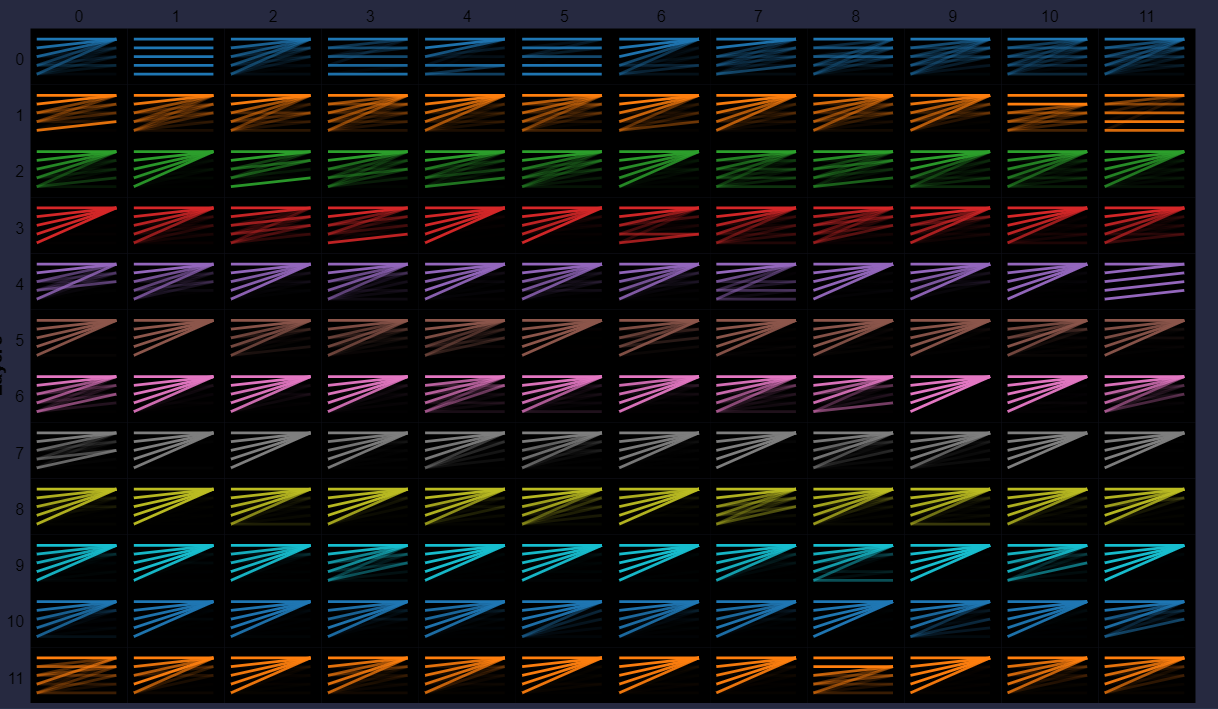

In [6]:
from transformers import AutoTokenizer, AutoModel, utils, AutoModelForCausalLM

from bertviz import model_view
utils.logging.set_verbosity_error()  # Suppress standard warnings

model_name = 'distilbert/distilgpt2'

model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)
inputs = tokenizer.encode(input_text, return_tensors='pt')  # Tokenize input text
outputs = model(inputs)  # Run model
attention = outputs[-1]  # Retrieve attention from model outputs
tokens = tokenizer.convert_ids_to_tokens(inputs[0])  # Convert input ids to token strings
model_view(attention, tokens)  # Display model view

<IPython.core.display.Javascript object>

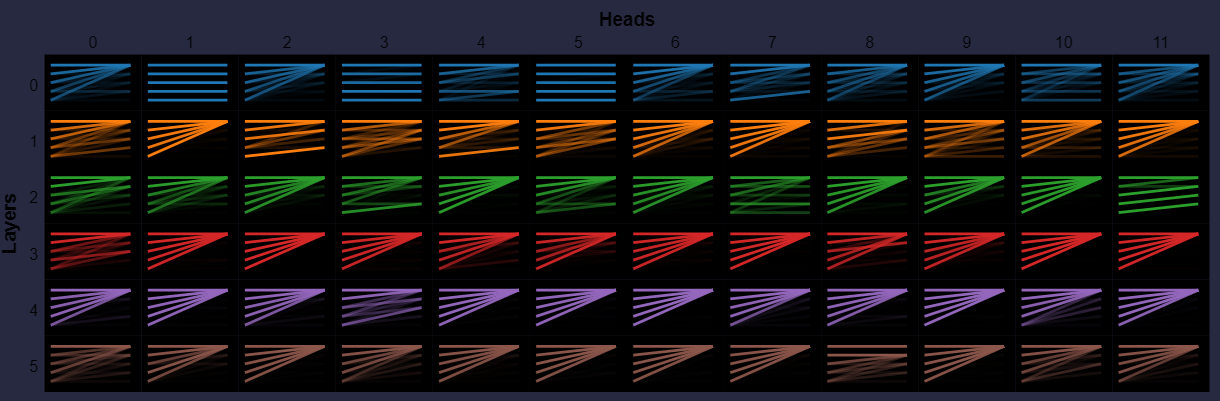

3. Comments:
* Text Generation:
* * Lower temperatures produce deterministic, repetitive text.
* * Higher temperatures increase creativity but may decrease coherence.
* * Short max_new_tokens: Produces concise responses, suitable for summaries or single sentences but may cut off mid-thought.
* * Long max_new_tokens: Generates detailed outputs, enabling elaboration but risks verbosity, repetition, or going off-topic.
* * Larger models tend to produce more fluent and context-aware text.
* Attention Analysis:
* * Larger models generally distribute attention more evenly across tokens.
* * Smaller models often exhibit sparse or overly simplified attention patterns.
